In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

# Task 1 (The Belousov-Zhabotinski reaction)

(a) Note down the stoichiometric matrix, the reaction rates, and the reaction rate equations for the five species involved.
![Solution](Task1.png)


(b) Solve the ODE system numerically on the time interval [0, 200] by choosing an
appropriate integrator and error tolerances. Plot the solution (do not forget axis
labels and legend).

In [2]:
#k = np.array([1.34, 1.6e9, 8e3, 4e7, 1])
y0 = np.array([0.6e-1, 0.33e-6, 0.5e-10, 0.3e-1, 0.24e-7]) # A(0), B(0), C(0), D(0), E(0)

def rate_ABCDE(y,t):
    k = np.array([1.34, 1.6e9, 8e3, 4e7, 1]) # k_1, k_2, k_3, k_4, k_5
    
    dAdt = (-k[0]*y[0]*y[1])+(-k[2]*y[0]*y[2])
    dBdt = (-k[0]*y[0]*y[1])+(-k[1]*y[1]*y[2])+(k[4]*y[4])
    dCdt = (k[0]*y[0]*y[1])+(-k[1]*y[1]*y[2])+(k[2]*y[0]*y[2])+(-k[3]*y[2]*y[2])
    dDdt = (k[1]*y[1]*y[2])+ (k[3]*y[2]*y[2])
    dEdt = (k[2]*y[0]*y[2])+(-k[4]*y[4])
    return [dAdt,dBdt,dCdt,dDdt,dEdt]

In [3]:
t = np.linspace(0,200,500)

y = odeint(rate_ABCDE,y0,t,rtol=1e-8,atol=1e-10)
Y = np.log(y) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


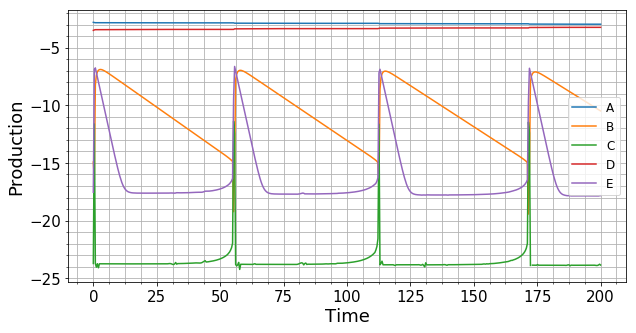

In [4]:
#fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(10, 20),sharex=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(t,Y[:,0],label='A')
ax.plot(t,Y[:,1],label='B')
ax.plot(t,Y[:,2],label='C')
ax.plot(t,Y[:,3],label='D')
ax.plot(t,Y[:,4],label='E')

ax.grid(which='both')
ax.minorticks_on()
ax.legend(loc='best',fontsize=12)
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Production', fontsize=18)
ax.tick_params(labelsize=15)

# Task 2 (Quasi steady state assumption)

(a) Construct an ODE model for the system and simulate it with initial conditions
A(0) = 1.5, B(0) = 3, C(0) = 2. Plot the results in two separate figures, one
showing the initial time transient behavior and another showing the steady state.

![Solution](Task2.png)

In [5]:
#k = np.array([0.05, 0.7, 0.005, 0.4]) # k_1, k_-1, k_2, k_-2
y0 = np.array([1.5,3,2]) # A(0), B(0), C(0)

def rate_ABC(y,t):
    k = np.array([0.05, 0.7, 0.005, 0.4]) # k_1, k_-1, k_2, k_-2
    
    dAdt = (-k[0]*y[0])+(k[1]*y[1])
    dBdt = (k[0]*y[0])+(-k[1]*y[1])+(-k[2]*y[1])+(k[3]*y[2])
    dCdt = (k[2]*y[1])+(-k[3]*y[2])
    return [dAdt,dBdt,dCdt]

t = np.linspace(0,20,100)
Y = odeint(rate_ABC,y0,t,rtol=1e-8,atol=1e-10)

y00 = np.array([1.5,2]) # A(0), C(0)

def rate_qssa(y,t):
    k = np.array([0.05, 0.7, 0.005, 0.4]) # k_1, k_-1, k_2, k_-2
    
    dAdt = -(k[0]*y[0]) + (k[1]*((k[0]*y[0])+(k[3]*y[1]))/(k[1]+k[2]))
    dBdt = 0
    dCdt = (k[2]*((k[0]*y[0])+(k[3]*y[1]))/(k[1]+k[2]))-(k[3]*y[1])
    return [dAdt,dCdt]

t1 = np.linspace(0,20,50)
Y1 = odeint(rate_qssa,y00,t1,rtol=1e-8,atol=1e-10)

Text(0.5,1,'Initial Transient Behaviour')

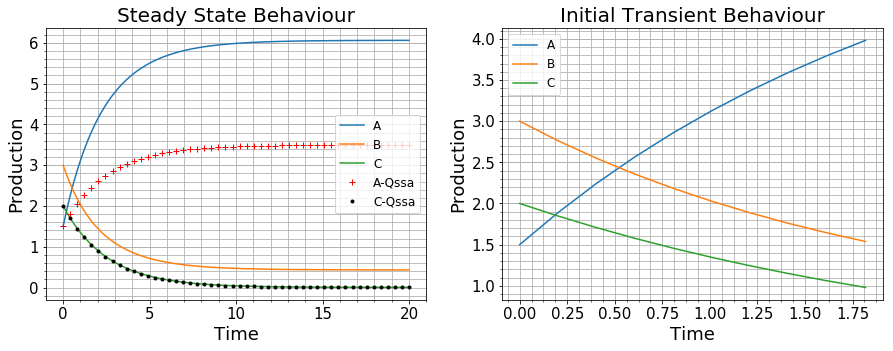

In [6]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 5))
ax1.plot(t,Y[:,0],label='A')
ax1.plot(t,Y[:,1],label='B')
ax1.plot(t,Y[:,2],label='C')
ax1.plot(t1,Y1[:,0],'r+',label='A-Qssa')
ax1.plot(t1,Y1[:,1],'k.',label='C-Qssa')

ax1.grid(which='both')
ax1.minorticks_on()
ax1.legend(loc='best',fontsize=12)
ax1.set_xlabel('Time', fontsize=18)
ax1.set_ylabel('Production', fontsize=18)
ax1.tick_params(labelsize=15)
ax1.set_title('Steady State Behaviour', fontsize=20)

ax2.plot(t[0:10],Y[0:10,0],label='A')
ax2.plot(t[0:10],Y[0:10,1],label='B')
ax2.plot(t[0:10],Y[0:10,2],label='C')

ax2.grid(which='both')
ax2.minorticks_on()
ax2.legend(loc='best',fontsize=12)
ax2.set_xlabel('Time', fontsize=18)
ax2.set_ylabel('Production', fontsize=18)
ax2.tick_params(labelsize=15)
ax2.set_title('Initial Transient Behaviour', fontsize=20)

![Solution](Task2b.png)

Text(0.5,1,'difference between correct solution and QSSA (for C)')

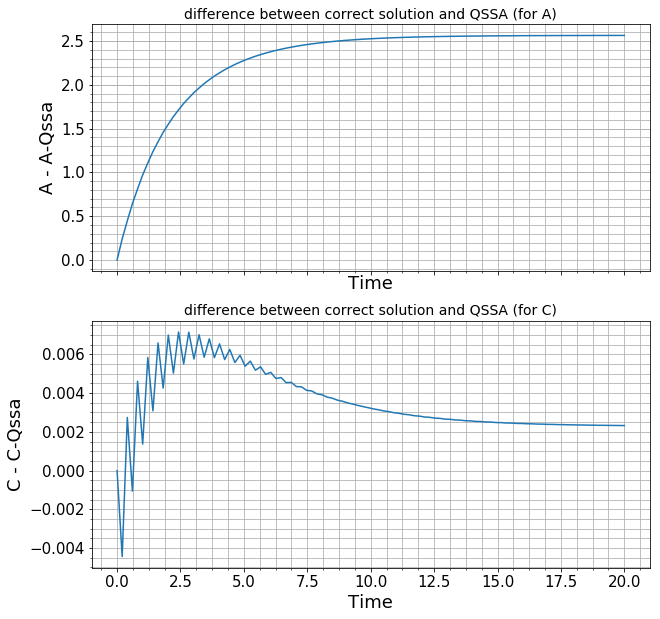

In [7]:
fa= interpolate.interp1d(t1,Y1[:,0])
fc= interpolate.interp1d(t1,Y1[:,1])
A_qssa = fa(t)
C_qssa = fc(t)

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10, 10), sharex=True)
ax1.plot(t,Y[:,0]-A_qssa)
ax1.grid(which='both')
ax1.minorticks_on()
ax1.set_xlabel('Time', fontsize=18)
ax1.set_ylabel('A - A-Qssa', fontsize=18)
ax1.tick_params(labelsize=15)
ax1.set_title('difference between correct solution and QSSA (for A)', fontsize=14)

ax2.plot(t,Y[:,2]-C_qssa)
ax2.grid(which='both')
ax2.minorticks_on()
ax2.set_xlabel('Time', fontsize=18)
ax2.set_ylabel('C - C-Qssa', fontsize=18)
ax2.tick_params(labelsize=15)
ax2.set_title('difference between correct solution and QSSA (for C)', fontsize=14)